In [201]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# !pip install kneed
# from kneed import KneeLocator
# import seaborn as sns

# Exploratory Data Analysis

In [202]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [204]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [205]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [206]:
# Mengecek missing values
missing_values = df.isnull().sum()

print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
CustomerID                0
Gender                    0
Age                       0
Annual Income             0
Spending Score (1-100)    0
dtype: int64


In [207]:
# Mengecek baris yang duplikat
duplicate_rows = df.duplicated()

print("Duplicate Rows (True = Duplicate):")
print(duplicate_rows.sum())  # Menampilkan jumlah baris duplikat


Duplicate Rows (True = Duplicate):
0


In [208]:
# Menghapus kolom 'CustomerID'
df = df.drop(columns=['CustomerID'])

print("Data setelah menghapus 'CustomerID':")
print(df.head())
# karena customer id tidak akan dianalisis

Data setelah menghapus 'CustomerID':
   Gender  Age  Annual Income  Spending Score (1-100)
0    Male   19             15                      39
1    Male   21             15                      81
2  Female   20             16                       6
3  Female   23             16                      77
4  Female   31             17                      40


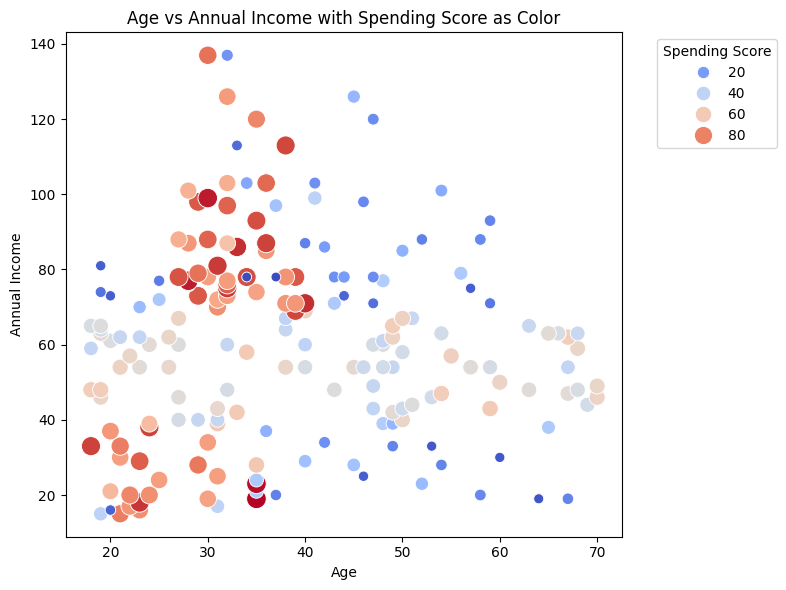

In [209]:
# Visualization 1: Scatter plot showing Age vs Annual Income (k$) with Spending Score as color
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income', hue='Spending Score (1-100)', palette='coolwarm', size='Spending Score (1-100)', sizes=(50, 200))
plt.title("Age vs Annual Income with Spending Score as Color")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.legend(title="Spending Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3678375950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')


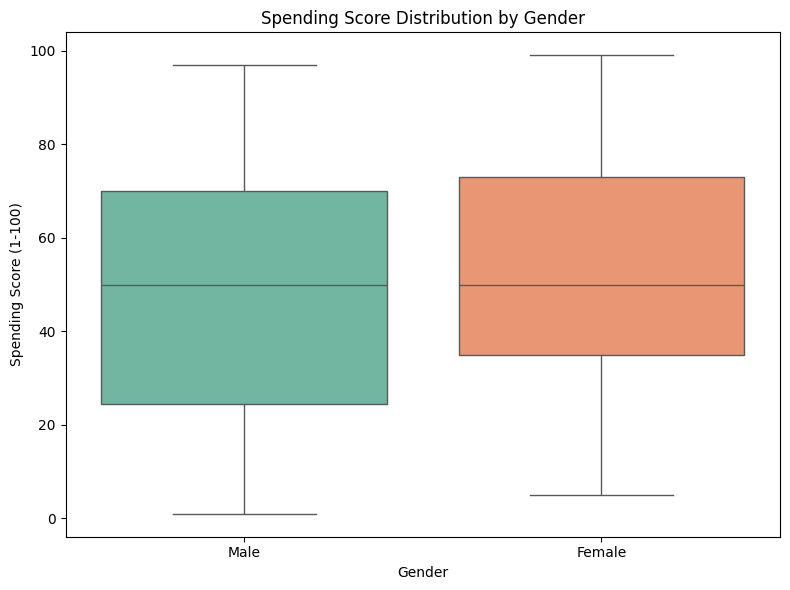

In [210]:
# Visualization 2: Box plot showing Spending Score distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')
plt.title("Spending Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.tight_layout()
plt.show()

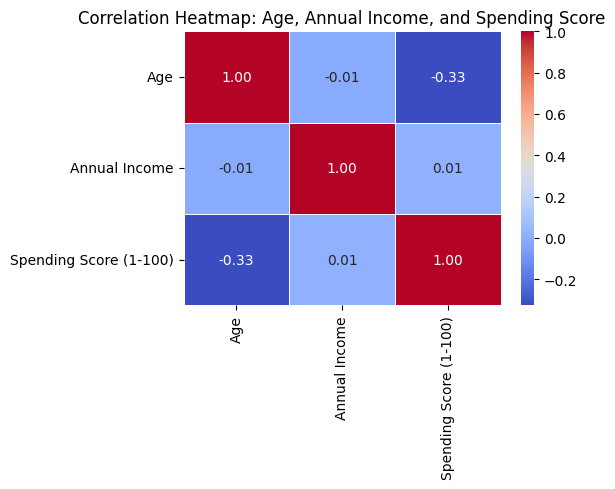

In [211]:
# Visualization 3: Heatmap of correlation between Age, Annual Income (k$), and Spending Score
correlation_matrix = df[['Age', 'Annual Income', 'Spending Score (1-100)']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap: Age, Annual Income, and Spending Score")
plt.tight_layout()
plt.show()

# **INSIGHT**

Age vs Annual Income with Spending Score: Younger customers tend to have a wider range of spending scores, while older customers mostly have lower spending scores.

Spending Score Distribution by Gender: Both genders have similar spending score distributions, but males have a slightly higher median spending score.

Correlation Heatmap: Age and spending score have a weak negative correlation, while income shows very little correlation with age or spending score.

In [212]:
df_original = df.copy()

In [213]:
from sklearn.preprocessing import LabelEncoder

# Melakukan Label Encoding pada kolom 'Gender'
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Menampilkan hasil encoding
df[['Gender', 'Gender_encoded']].head()


,Gender,Gender_encoded
0,Male,1
1,Male,1
2,Female,0
3,Female,0
4,Female,0


In [214]:
# Binning untuk Age
bins_age = [0, 25, 45, 65, 100]  # batas usia
labels_age = ['Young', 'Adult', 'Middle-aged', 'Senior']

df['Age_category'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

# Cek hasil
df[['Age', 'Age_category']].head(10)


,Age,Age_category
0,19,Young
1,21,Young
2,20,Young
3,23,Young
4,31,Adult
5,22,Young
6,35,Adult
7,23,Young
8,64,Middle-aged
9,30,Adult


In [215]:
# Binning untuk Annual Income (k$)
bins_income = [0, 40, 70, 150]
labels_income = ['Low', 'Medium', 'High']

df['Income_category'] = pd.cut(df['Annual Income'], bins=bins_income, labels=labels_income, right=False)

df[['Annual Income', 'Income_category']].head(10)


,Annual Income,Income_category
0,15,Low
1,15,Low
2,16,Low
3,16,Low
4,17,Low
5,17,Low
6,18,Low
7,18,Low
8,19,Low
9,19,Low


In [216]:
# Binning untuk Spending Score (1–100)
bins_spending = [0, 40, 70, 100]
labels_spending = ['Low', 'Medium', 'High']

df['Spending_category'] = pd.cut(df['Spending Score (1-100)'], bins=bins_spending, labels=labels_spending, right=False)

df[['Spending Score (1-100)', 'Spending_category']].head(10)


,Spending Score (1-100),Spending_category
0,39,Low
1,81,High
2,6,Low
3,77,High
4,40,Medium
5,76,High
6,6,Low
7,94,High
8,3,Low
9,72,High


In [217]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
cols_to_encode = ['Gender_encoded', 'Age_category', 'Income_category', 'Spending_category']

le = LabelEncoder()
for col in cols_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,Gender,Age,Annual Income,Spending Score (1-100),Gender_encoded,Age_category,Income_category,Spending_category
0,Male,19,15,39,1,3,1,1
1,Male,21,15,81,1,3,1,0
2,Female,20,16,6,0,3,1,1
3,Female,23,16,77,0,3,1,0
4,Female,31,17,40,0,0,1,2


In [218]:
df_encoded = df_encoded[['Gender_encoded','Age_category', 'Income_category','Spending_category']]
df_encoded.head()

,Gender_encoded,Age_category,Income_category,Spending_category
0,1,3,1,1
1,1,3,1,0
2,0,3,1,1
3,0,3,1,0
4,0,0,1,2


\Kolom Gender diubah menjadi nilai biner (Male = 1, Female = 0), sedangkan kolom Age, Income, dan Spending Score dibagi menjadi beberapa kategori (misalnya Low, Medium, High atau Young, Adult, Senior) yang kemudian diubah menjadi angka. Proses ini memastikan semua variabel memiliki format numerik yang konsisten dan dapat dihitung jaraknya saat dilakukan clustering.

# Data Scaling (Choose One)

In [219]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang mau discale
features = ["Gender_encoded", "Age_category", "Income_category", "Spending_category"]

# Standardization
scaler = StandardScaler()
df_sc_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[features]), columns=features)

# Preview hasil scaling
print("Scaled Data (first 5 rows):")
print(df_sc_scaled.head())


Scaled Data (first 5 rows):
   Gender_encoded  Age_category  Income_category  Spending_category
0        1.128152      1.845179        -0.011397          -0.200420
1        1.128152      1.845179        -0.011397          -1.415087
2       -0.886405      1.845179        -0.011397          -0.200420
3       -0.886405      1.845179        -0.011397          -1.415087
4       -0.886405     -0.841975        -0.011397           1.014247


# K-Means Clustering


WCSS Values:
   Number of Clusters        WCSS
0                   1  800.000000
1                   2  487.529744
2                   3  368.058833
3                   4  284.554847
4                   5  205.664774
5                   6  170.367090
6                   7  145.494352
7                   8  122.860607
8                   9  101.815997
9                  10   83.767919


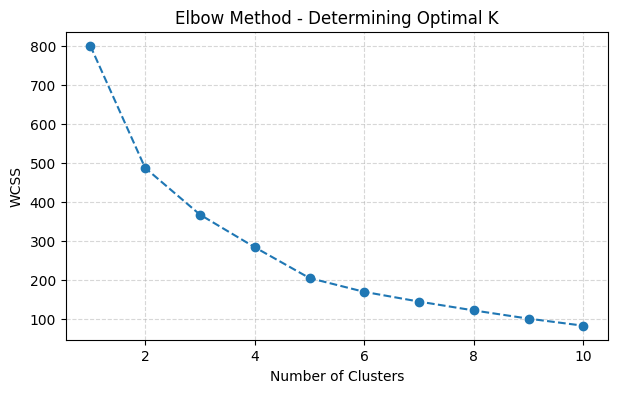

In [220]:
from sklearn.cluster import KMeans

# Simpan nilai WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):  # Uji dari 1 sampai 10 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Buat tabel WCSS
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})
print("\nWCSS Values:")
print(wcss_table)

# Plot grafik Elbow
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method - Determining Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


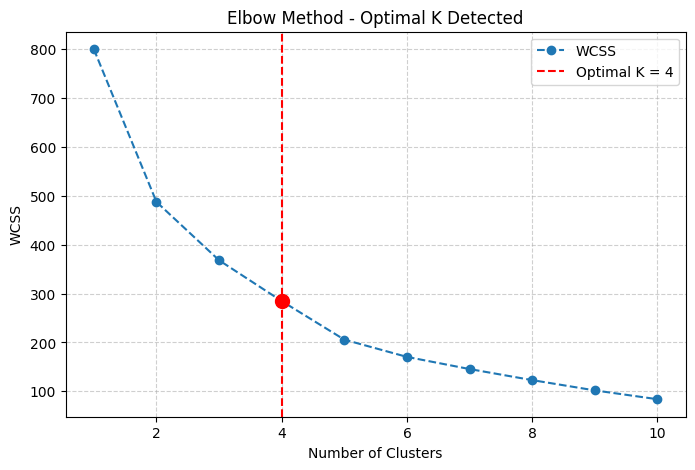

✅ Optimal number of clusters: 4


In [221]:
from kneed import KneeLocator

clusters = range(1, 11)
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot dengan titik elbow otomatis
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal K = {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)
plt.title('Elbow Method - Optimal K Detected')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ Optimal number of clusters: {optimal_clusters}")


In [222]:
from sklearn.cluster import KMeans

# Fit model dengan K optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Tambahkan hasil cluster ke DataFrame
df_sc_scaled['Cluster'] = clusters

# Preview hasil clustering
print("\nClustered Data (first 5 rows):")
print(df_sc_scaled.head())



Clustered Data (first 5 rows):
   Gender_encoded  Age_category  Income_category  Spending_category  Cluster
0        1.128152      1.845179        -0.011397          -0.200420        0
1        1.128152      1.845179        -0.011397          -1.415087        0
2       -0.886405      1.845179        -0.011397          -0.200420        1
3       -0.886405      1.845179        -0.011397          -1.415087        1
4       -0.886405     -0.841975        -0.011397           1.014247        2


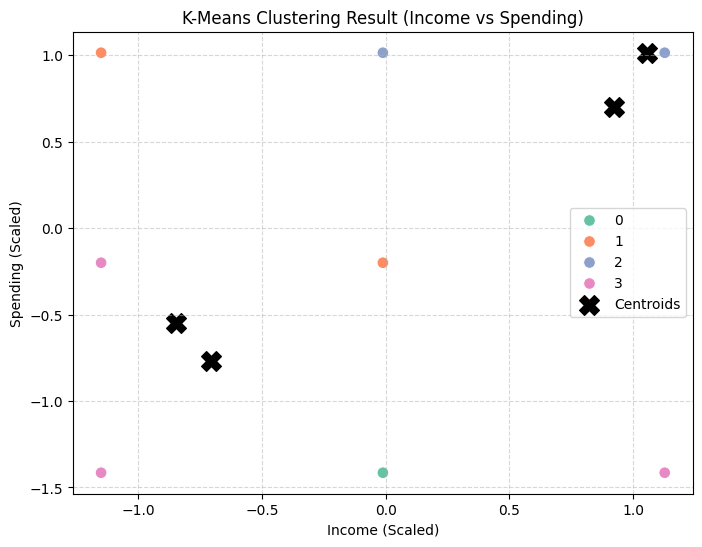

In [223]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Income_category",
    y="Spending_category",
    hue="Cluster",
    palette="Set2",
    data=df_sc_scaled,
    s=70
)

# Tambahkan titik centroid
plt.scatter(
    kmeans.cluster_centers_[:, features.index("Income_category")],
    kmeans.cluster_centers_[:, features.index("Spending_category")],
    s=200, c="black", marker="X", label="Centroids"
)

plt.title("K-Means Clustering Result (Income vs Spending)")
plt.xlabel("Income (Scaled)")
plt.ylabel("Spending (Scaled)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


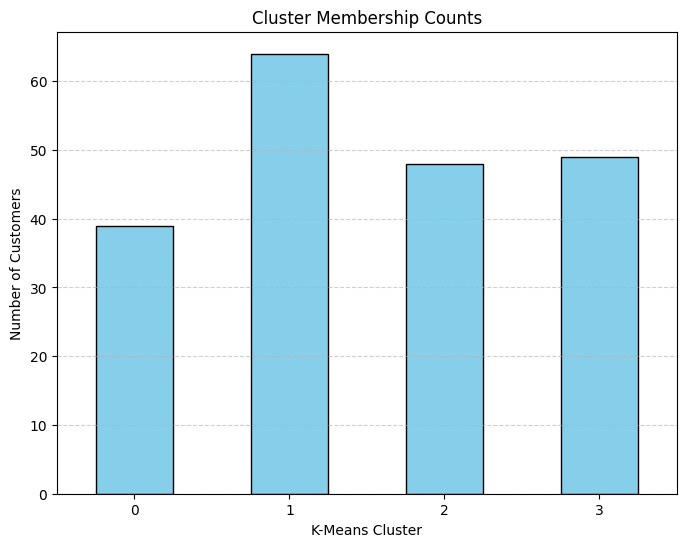

In [224]:
# Hitung jumlah anggota tiap cluster
cluster_counts = df_sc_scaled['Cluster'].value_counts().sort_index()

# Plot jumlah anggota per cluster
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Interpretation of K-Means Clustering Results

Based on the K-Means clustering with 3 optimal clusters, the dataset reveals three distinct consumer segments that differ in age, income, and spending characteristics.

Cluster 0 – Young / Mid-Income Consumers

This group consists mainly of younger customers, averaging around 28 years old, with moderate income levels (around $58K annually).
They are typically at the early stage of their careers — tech-savvy, price-sensitive, and still developing financial stability.
From a managerial standpoint, this cluster is suitable for affordable product lines and digital marketing strategies such as influencer campaigns or social media promotions.
Building brand loyalty early through rewards or discount bundles can help retain these customers as their income grows.

Cluster 1 – Mature / High-Income Professionals

Cluster 1 represents the most affluent segment, with customers in their mid-to-late 30s and the highest income bracket (averaging around $150K).
These consumers are well-established professionals with significant purchasing power and a strong preference for quality and exclusivity.
They respond best to premium offerings, personalized experiences, and VIP-level services.
Strategically, businesses should emphasize status, trust, and convenience in their marketing communication.
This cluster also offers the highest potential for cross-selling and upselling, as they tend to have high brand loyalty once satisfied.

Cluster 2 – Older-Mid / Moderate-Income Group

Cluster 2 includes customers in their late 30s to early 40s, with moderate income levels (around $68K).
They are typically in a stable phase of their careers, but may have financial responsibilities such as family or mortgage commitments.
Their purchasing decisions balance between value and practicality.
Managers should focus on value-for-money strategies, promoting product durability, customer support, and security.
This cluster is also ideal for family-oriented marketing campaigns and installment-based offers that make larger purchases more accessible.

Overall Insights

The clustering results provide a clear segmentation of the market:

Cluster 0 → Emerging consumers with potential for long-term loyalty.

Cluster 1 → High-value customers with strong purchasing power.

Cluster 2 → Stable, family-focused consumers balancing cost and quality.

By tailoring marketing strategies to each group’s needs and characteristics, companies can enhance targeting precision, customer retention, and overall profitability.